# 说明：

本例和前面的“航空评论情绪分类”其实是一类问题，本例主要展示“用keras自带的文本处理工具”来进行数据预处理。

keras内置的很多“数据预处理”工具，都在：keras.preprocessing中

注意：这里使用的kaggle电影评价数据集，和keras自带的那一套imdb不是同一个！

In [47]:
import numpy as np
import pandas as pd 
import keras
import re   # 对特殊字符的处理
import matplotlib.pyplot as plt
from keras import layers

In [48]:
# 用“逗号”作为分隔符的为.csv文件，用“制表符\t”作为分隔符的谓.tsv文件；
# 因为“\t”分隔符与pd.read_csv默认不同，需要设置一下sep参数：
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/IMDB评论数据/labeledTrainData.tsv', sep = '\t')

In [49]:
data.head()
# 数据很简单、干净，并且类比也分的很好（1表达正面评价，0代表负面评价）。
# 只需sentiment、review列

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [50]:
len(data.review[0])  # 每条评论都很长

2302

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [52]:
data.sentiment.value_counts()
# 数据分的非常好！非常均衡！

1    12500
0    12500
Name: sentiment, dtype: int64

所以，现在只需对review进行“文本预处理”即可：
- 把所有的“大写字母”转为“小写字母”；
- 标点符号可以全删；当然保留一些常见的最好（比如！！！有很强烈的情感），不常见标点肯定是删掉；
- 删掉“多余的空格”；

# 文本预处理（清理）：

策略：
- 把常用的标点符号，与前后单词各间隔一个空格，使得这些标点直接当做一个单词；其他杂符号直接用空字符替换删掉；
- 用一个函数来集成这些正则化处理，因为data是pandas中的DateFrame格式，因此可以用data.apply(函数)；
- 最后要把文本进行分裂，即把“每个单词 + 标点”分裂出来成为列表中的一个个元素；

In [53]:
def preprocess_sentence(w):
    w = w.lower()   # 转小写
    w = w.strip()   # 去掉开头结尾的空格
    # 下面都是“替换”操作：
    w = re.sub( r"([?.!,])", r" \1 ", w )    # 把[?.!,]这4中常见标点，替换成前后各一个空格的自己；
    w = re.sub( r'[" "]+', " ", w )          # 把一个或多个空格，替换成一个空格；
    w = re.sub( r"[^a-zA-Z?,!.]+", " ", w )  # 把除了[]里的内容全替换为空格；
    w = w.strip()                            # 再次去掉前后的空格
    return w.split()                        # 把句子中的元素分裂成一个个的列表元素

In [54]:
text = [ preprocess_sentence(w) for w in data.review ] 

In [55]:
text[1]

['the',
 'classic',
 'war',
 'of',
 'the',
 'worlds',
 'by',
 'timothy',
 'hines',
 'is',
 'a',
 'very',
 'entertaining',
 'film',
 'that',
 'obviously',
 'goes',
 'to',
 'great',
 'effort',
 'and',
 'lengths',
 'to',
 'faithfully',
 'recreate',
 'h',
 '.',
 'g',
 '.',
 'wells',
 'classic',
 'book',
 '.',
 'mr',
 '.',
 'hines',
 'succeeds',
 'in',
 'doing',
 'so',
 '.',
 'i',
 ',',
 'and',
 'those',
 'who',
 'watched',
 'his',
 'film',
 'with',
 'me',
 ',',
 'appreciated',
 'the',
 'fact',
 'that',
 'it',
 'was',
 'not',
 'the',
 'standard',
 ',',
 'predictable',
 'hollywood',
 'fare',
 'that',
 'comes',
 'out',
 'every',
 'year',
 ',',
 'e',
 '.',
 'g',
 '.',
 'the',
 'spielberg',
 'version',
 'with',
 'tom',
 'cruise',
 'that',
 'had',
 'only',
 'the',
 'slightest',
 'resemblance',
 'to',
 'the',
 'book',
 '.',
 'obviously',
 ',',
 'everyone',
 'looks',
 'for',
 'different',
 'things',
 'in',
 'a',
 'movie',
 '.',
 'those',
 'who',
 'envision',
 'themselves',
 'as',
 'amateur',
 'cri

# 用keras对文本进行“向量化”：

In [56]:
max_words = 20000

In [57]:
# 把列表里的“每句话”中的每个单词转换为一个数字：最大编码值为20000
# keras自带的转换函数：其中filters是“过滤”作用，默认过滤了很多东西，因此我们要转为过滤为''空；
tokenizer = keras.preprocessing.text.Tokenizer(num_words = max_words, filters = '')  

# 应用到对应的文本：
tokenizer.fit_on_texts(text)
# 每个元素转为int：
tensor = tokenizer.texts_to_sequences(text)

In [58]:
tensor[0]

[19,
 34,
 13,
 533,
 173,
 184,
 35,
 1,
 550,
 19,
 8968,
 12,
 142,
 639,
 2604,
 7,
 29,
 227,
 3,
 152,
 1,
 1013,
 648,
 131,
 4,
 43,
 3,
 297,
 1,
 18846,
 4,
 297,
 11402,
 177,
 2,
 282,
 12,
 46,
 185,
 7,
 79,
 5,
 798,
 2605,
 87,
 13,
 229,
 39,
 12,
 199,
 16,
 69,
 631,
 11,
 1,
 4224,
 46,
 7,
 282,
 99,
 60,
 64,
 331,
 715,
 27,
 8,
 2480,
 45,
 1335,
 2,
 11402,
 8,
 176,
 4976,
 3,
 176,
 772,
 22,
 66,
 12,
 375,
 173,
 7,
 70,
 35,
 1,
 427,
 58,
 10,
 16,
 1807,
 619,
 2,
 53,
 6,
 10,
 50,
 1283,
 3413,
 47,
 8968,
 15,
 541,
 933,
 1,
 3490,
 4,
 86,
 1,
 571,
 734,
 6,
 1644,
 28,
 80,
 145,
 4573,
 2,
 9,
 9,
 1997,
 1138,
 21,
 6,
 263,
 13,
 8,
 34,
 47,
 470,
 1584,
 40,
 882,
 24,
 2569,
 42,
 8968,
 11,
 548,
 97,
 24,
 28,
 173,
 7,
 774,
 13,
 4,
 172,
 10,
 357,
 2,
 53,
 203,
 673,
 8968,
 38,
 18,
 7,
 1,
 232,
 6,
 13,
 20,
 21,
 8968,
 4,
 94,
 6,
 29,
 450,
 65,
 137,
 14,
 27,
 95,
 10,
 18,
 1,
 450,
 66,
 49,
 284,
 8,
 69,
 328,
 6,
 92,
 2,

In [59]:
# 把不同的句子，填充到同一长度：
max_len = 500
tensor = keras.preprocessing.sequence.pad_sequences(tensor, maxlen = max_len, padding = 'post' )
# 参数padding：默认是在前面填充0，改为post就是在后面填充

In [60]:
len(tensor[2]), tensor.shape, tensor[2].shape

(500, (25000, 500), (500,))

# 模型搭建 + 可视化：

In [61]:
model = keras.Sequential()

In [62]:
# 词向量化：
model.add( layers.Embedding(max_words, 100, input_length = max_len) )
model.add( layers.Conv1D(64, 11, activation = 'relu', padding = 'same') )  # 用same，经过卷积层不变小
model.add( layers.MaxPooling1D() )  # 注：MaxPool1D与MaxPooling1D没有区别，前者只是保留老版本的名字。

model.add( layers.Dropout(0.5) )

# 经过池化层后，数据变小；此时下一个卷积层仍保持11大小的卷积核，实际上它的感受野增大了！
model.add( layers.Conv1D(128, 11, activation = 'relu', padding = 'same') )
model.add( layers.MaxPooling1D() )

model.add( layers.Dropout(0.5) )

model.add( layers.Conv1D(256, 11, activation = 'relu', padding = 'same') )
model.add( layers.MaxPooling1D() )
model.add( layers.Dropout(0.5) )

model.add( layers.GlobalAveragePooling1D() )  # 把数据展平:
model.add( layers.Dropout(0.5) )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [63]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 100)          2000000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 500, 64)           70464     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 250, 64)           0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 250, 64)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 250, 128)          90240     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 125, 128)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 125, 128)         

### 模型的可视化：pydot + graphviz 

模型的可视化：都在keras.utils.plot_model()里
需要额外安装两个包：pydot、graphviz —— 在linux下直接pip install pydot和pip install graphviz即可

但在win下：graphviz需要自己安装.msi文件，然后把它添加到“环境变量”中。下面用os模块来完成添加环境变量操作。

In [64]:
import os
os.environ['PATH'] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'  # 加r，防转义 

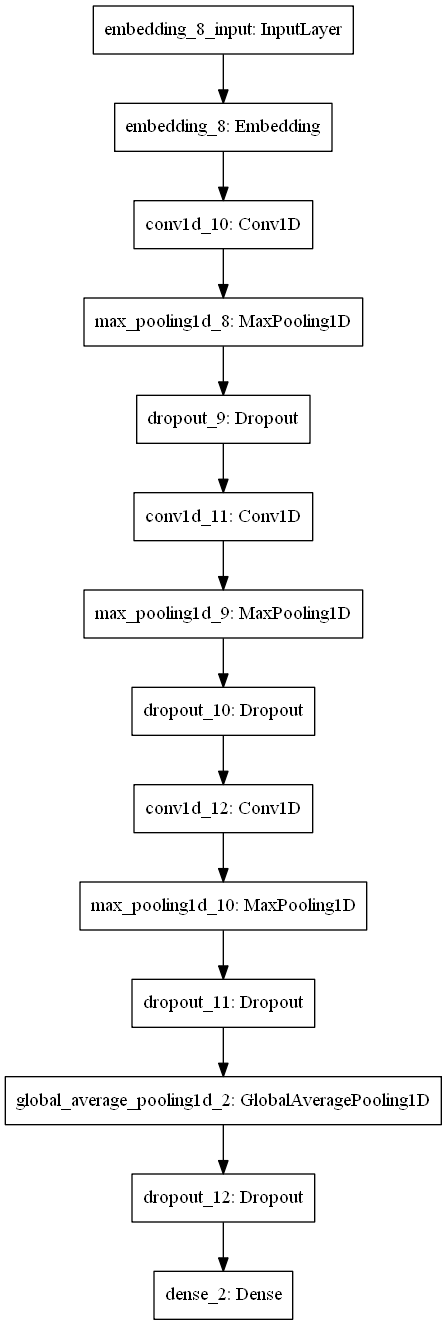

In [65]:
keras.utils.plot_model(model, to_file = '模型可视化.png')

### 数据划分：训练集 + 测试集

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# x是数据，y是标签
train_x, test_x, train_y, test_y = train_test_split(tensor, data.sentiment)

###  网络训练：

In [69]:
# 可以直接用字符串，也可以用函数的那种
model.compile( optimizer = keras.optimizers.Adam(),
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

In [70]:
history = model.fit( train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y) )


Train on 18750 samples, validate on 6250 samples
Epoch 1/10
 1664/18750 [=>............................] - ETA: 2:38 - loss: 0.6962 - acc: 0.4591

KeyboardInterrupt: 

# 用回调函数监控训练：

In [71]:
# 回调函数1：根据观测值(val_loss)，提前停止训练 —— 如果连续3个的val_loss没有下降，就提前停止训练
# 它停止训练时，还保存当前最好模型(val_loss最小)的权重参数
callbacks1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 回调函数2(前面讲过的)：实时保存每个epoch的模型 —— 不断覆盖
path = 'E:/Python_code/keras_total/'
callbacks2 = keras.callbacks.ModelCheckpoint( filepath = path, monitor = 'val_loss', save_best_only = True )

In [72]:
# 训练时多加一个“callbacks”参数：
history = model.fit( 
    train_x, 
    train_y, 
    epochs=10, 
    batch_size=128, 
    validation_data=(test_x, test_y),
    callbacks = [callbacks1, callbacks2]   # 可以同时用多个回调函数，用一个列表传入即可
)

Train on 18750 samples, validate on 6250 samples
Epoch 1/10
  512/18750 [..............................] - ETA: 2:44 - loss: 0.6930 - acc: 0.5137

KeyboardInterrupt: 